In [45]:
# Importing Libraries

# Used for Data Manipulation and Analysis
import pandas as pd
import numpy as np
import io

# Used for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

# Used for NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.layers import LSTM,Bidirectional,GRU,MaxPooling1D,Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.models import Sequential

<ipython-input-45-a72ebf04b4fb>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [6]:
# Reading data from csv
url1 = 'https://raw.githubusercontent.com/bhartio123/omprojectfile/main/train.csv'
url2 = 'https://raw.githubusercontent.com/bhartio123/omprojectfile/main/test.csv'
train = pd.read_csv(url1)
test  = pd.read_csv(url2)
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Reading data from csv
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Let's explore the columns in the dataset
id : A unique identifier for each tweet.
keyword : A particular keyword from the tweet (may be blank).
location: The location the tweet was sent from (may be blank).
text : The text of the tweet.
target : This denotes whether a tweet is about a real disaster (1) or not (0).

In [8]:
# Displaying rows and columns in dataset

print("There are {} rows and {} columns in training data".format(train.shape[0],train.shape[1]))
print("There are {} rows and {} columns in testing data".format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in training data
There are 3263 rows and 4 columns in testing data


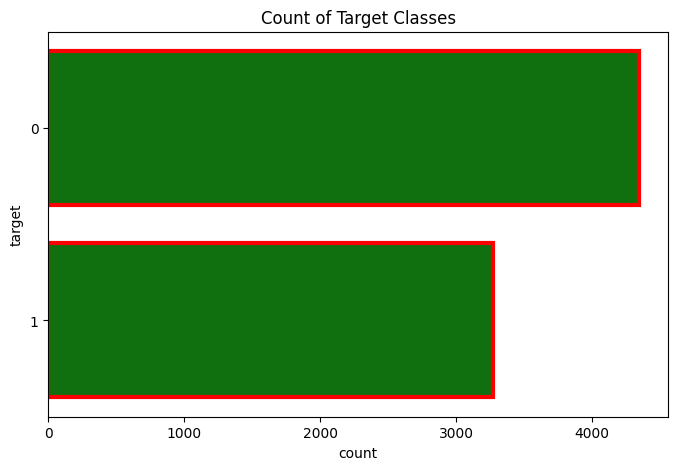

In [9]:
# explore the Target Variable
# Visualizing the target classes
plt.figure(figsize=(8,5))
plt.title("Count of Target Classes")
sns.countplot(y=train["target"],linewidth=3,
                   edgecolor='red', color='green')

plt.show()

Analysing total number of characters in text.

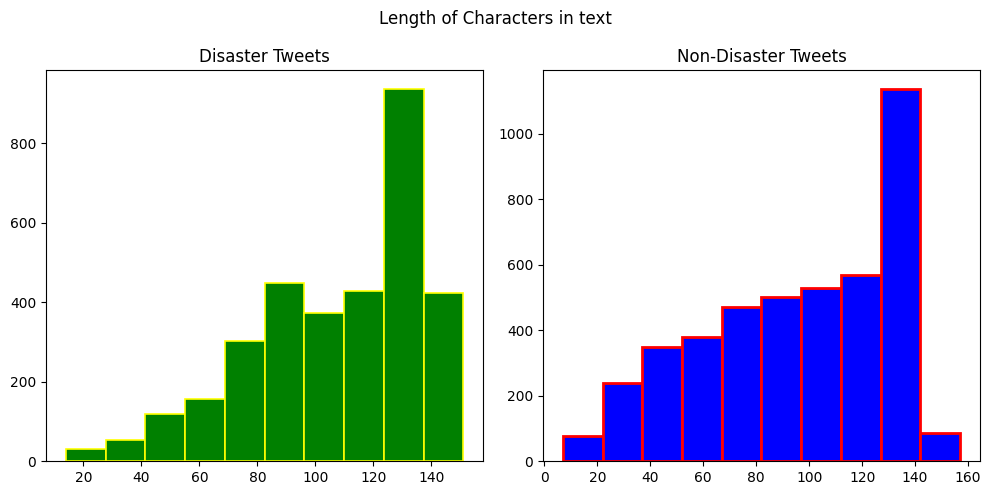

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.len()
ax1.hist(char_len_dis,color='green',edgecolor='yellow', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.len()
ax2.hist(char_len_ndis,color='blue',edgecolor='red', linewidth=2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Length of Characters in text")
plt.tight_layout()
plt.show()

Analysing number of words in text.

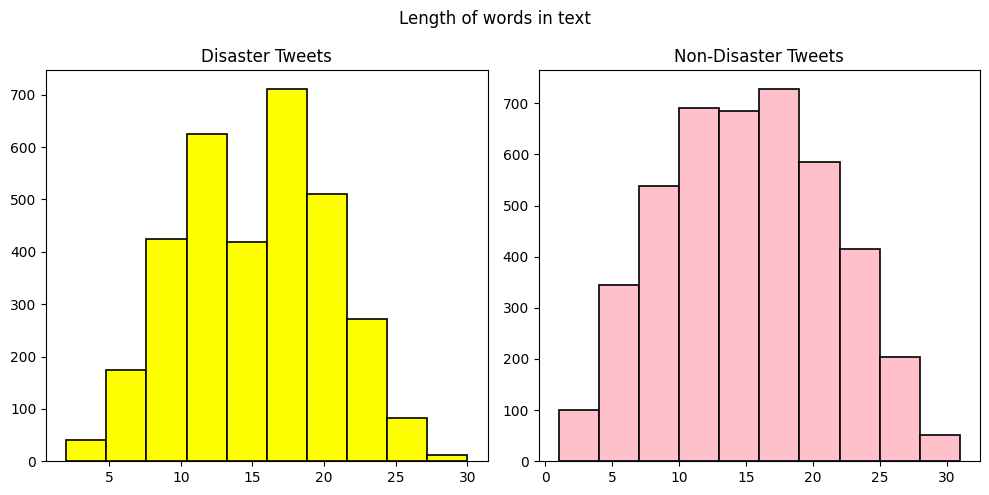

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(char_len_dis,color='yellow',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(char_len_ndis,color='pink',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Length of words in text")
plt.tight_layout()
plt.show()

Analysing average word length in text.

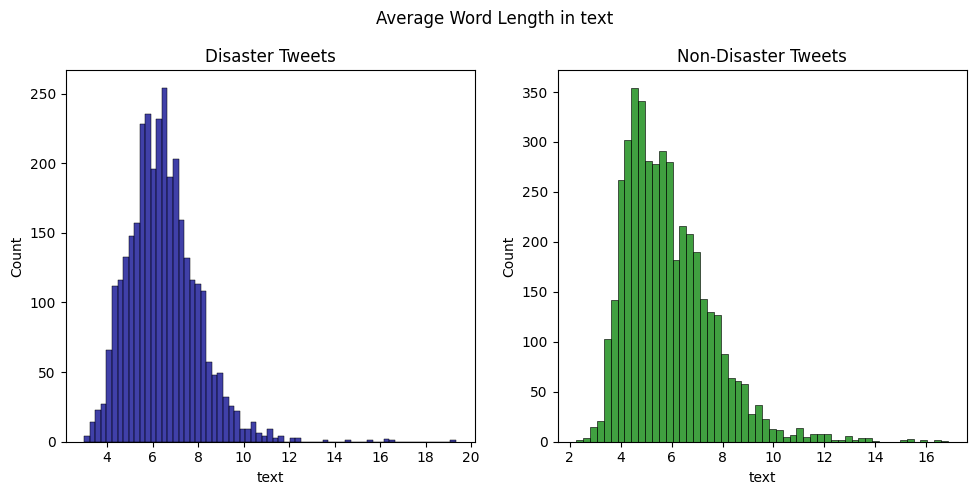

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(char_len_dis.map(lambda x: np.mean(x)),ax=ax1,color='darkblue')
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(char_len_ndis.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Average Word Length in text")
plt.tight_layout()
plt.show()

Let's explore the data further in depth:-
1. Stop Words Analysis
2. Punctuations Analysis
3. Analysis of Missing words.

In [13]:
# Creating sample corpus for further analysis.
def create_corpus(target):
    corpus = []
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

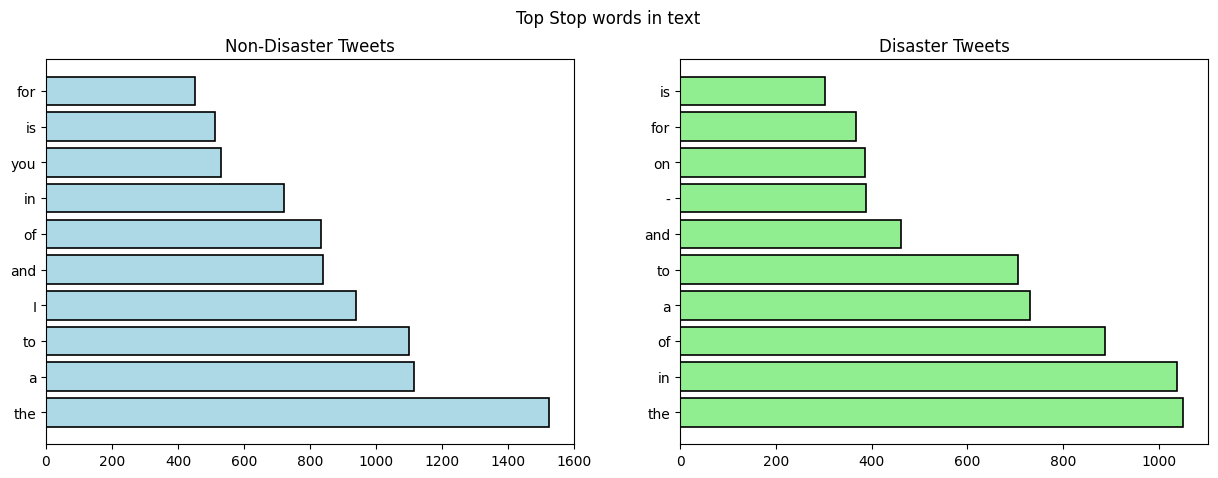

In [14]:
# Analysing top stop words in text.
from collections import defaultdict

def analyze_stopwords(data,func,target):
    values_list = []
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for word in corpus:
            dic[word]+=1
        top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
        x_items,y_values = zip(*top)
        values_list.append(x_items)
        values_list.append(y_values)

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.barh(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")

    ax2.barh(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")

    plt.suptitle("Top Stop words in text")
    plt.show()

analyze_stopwords(train,create_corpus,[0,1])

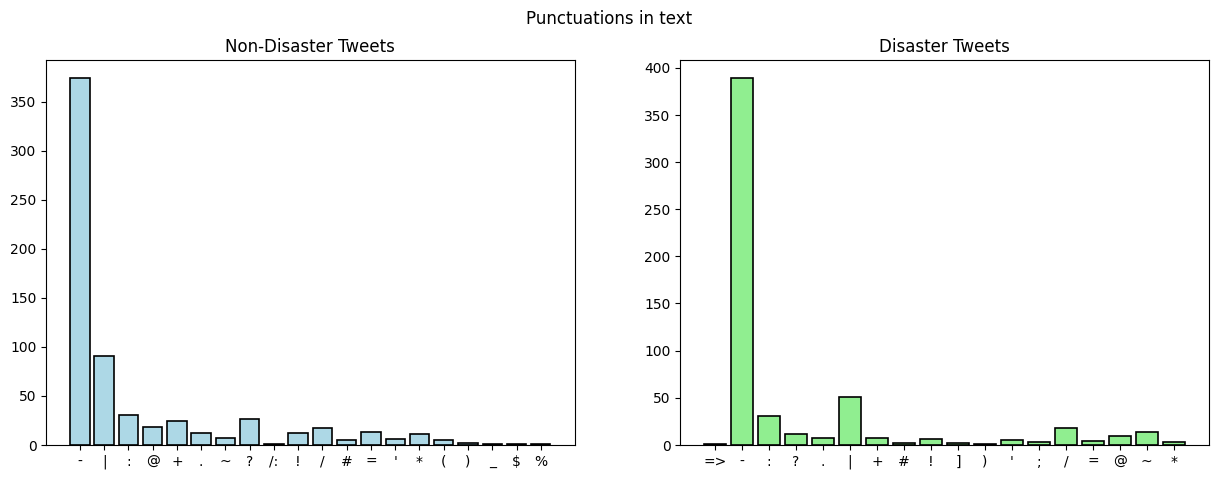

In [15]:
# Anaysing Punctuations
import string

def analyze_punctuation(data,func,target):
    values_list = []
    special = string.punctuation
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for i in corpus:
            if i in special:
                dic[i]+=1
        x_items,y_values = zip(*dic.items())
        values_list.append(x_items)
        values_list.append(y_values)

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")

    ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")

    plt.suptitle("Punctuations in text")
    plt.show()

analyze_punctuation(train,create_corpus,[0,1])

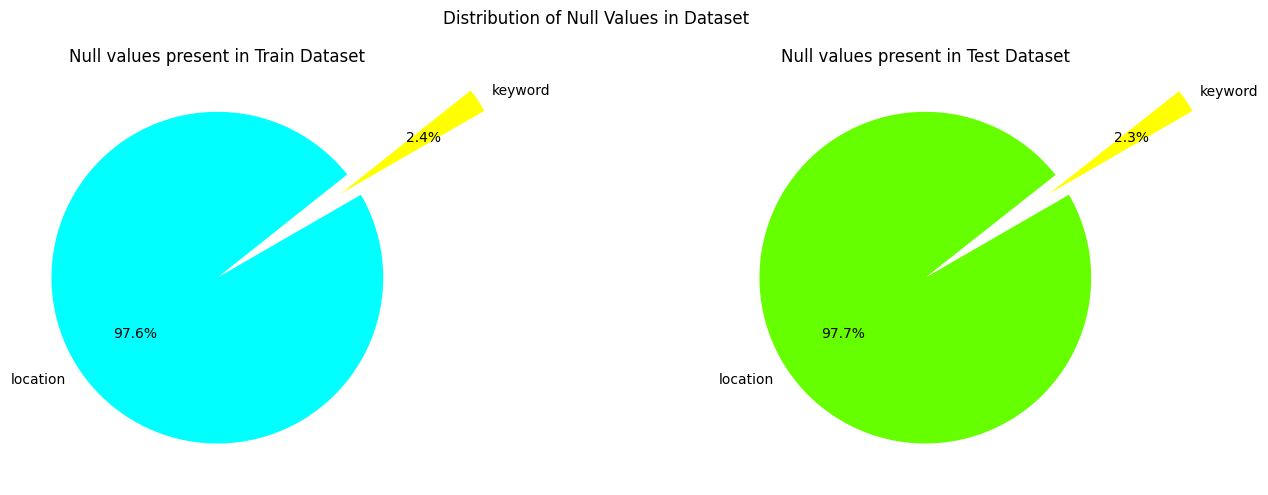

In [16]:
# Checking Null values
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
missing_train = missing_train[missing_train>0].sort_values()
ax1.pie(missing_train,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['yellow','cyan'])
ax1.set_title("Null values present in Train Dataset")

missing_test = missing_test[missing_test>0].sort_values()
ax2.pie(missing_test,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['yellow','#66ff00'])
ax2.set_title("Null values present in Test Dataset")
plt.suptitle("Distribution of Null Values in Dataset")
plt.tight_layout()
plt.show()

Let's analyze the keywords column:-

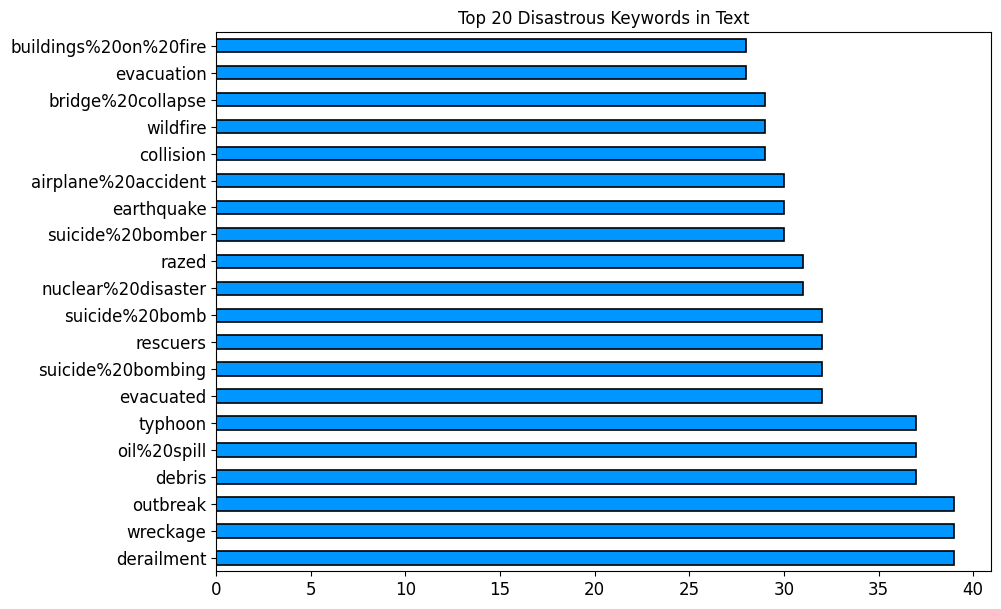

In [17]:
# Analysing Top 20  disastrous KeyWords in text .
plt.figure(figsize=(10,7))
train[train['target']==1]['keyword'].value_counts()[:20].plot(kind='barh', fontsize=12,title='Top 20 Disastrous Keywords in Text', color='#0096FF',edgecolor='black', linewidth=1.2)
plt.show()

Let's analyze Locations column:-

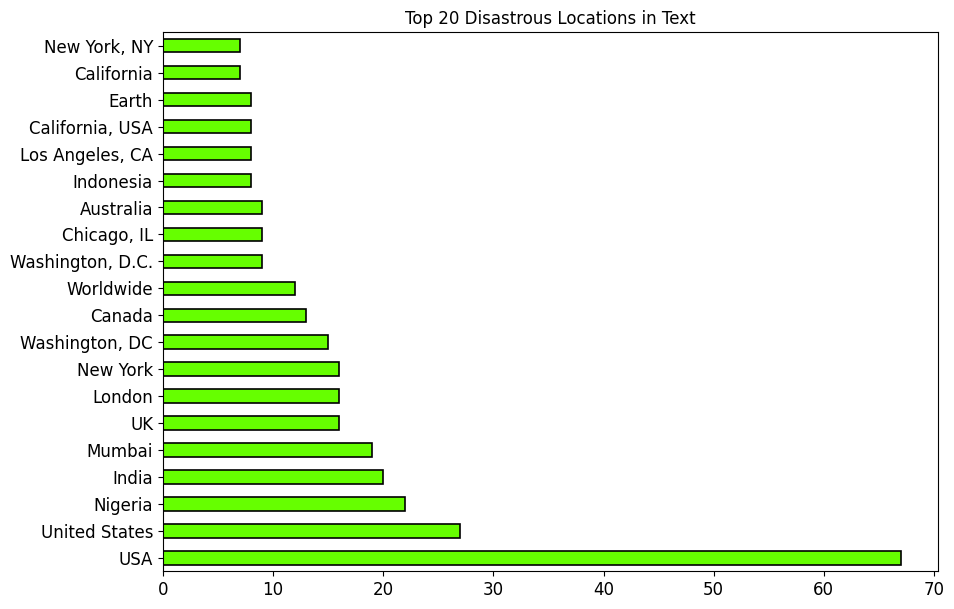

In [18]:
# Analysing Top 20 disastrous Locations in text.
plt.figure(figsize=(10,7))
train[train["target"]==1]["location"].value_counts()[:20].plot(kind='barh',fontsize=12, title='Top 20 Disastrous Locations in Text', color='#66ff00',edgecolor='black', linewidth=1.2)
plt.show()

Let's Clean the Data. Following operations are carried out on text column for performing Data Cleaning

*   Removal of URL's.
*   Removal of HTMl tags.
*   Removal of Emoji's.
*   Filtering out miscellaneous text.
*   Lowering the text.
*   Performing Stemming (in case of bag of words(bow) and tf-idf) and
    lemmatization for (LSTM).
*   Discarding words of length < 2.

Note: The Stemming process is performed for bow and tf-idf because there is no need of meaningful words while lemmatization is performed for LSTM because we do require meaningful words (discussed in subsequent sections).

In [21]:
# Seperating independent and dependent features
X = train.drop(columns=["target"],axis=1)
y = train["target"]

In [22]:
# Perfoming data cleaning

messages_train = X.copy()
messages_test  = test.copy()

nltk.download('stopwords')

ps = PorterStemmer()
wl = WordNetLemmatizer()
def preprocess_data(data):
    '''
    Input: Data to be cleaned.
    Output: Cleaned Data.

    '''
    review =re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) #removal of url
    review =re.sub(r'<.*?>',' ',review) #removal of html tags
    review = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',review)
    review = re.sub('[^a-zA-Z]',' ',review) # filtering out miscellaneous text.
    review = review.lower() # Lowering all the words in text
    review = review.split()
    review = [ps.stem(words) for words in review if words not in stopwords.words('english')] #Stemming
    review = [i for i in review if len(i)>2] # Removal of words with length<2
    review = ' '.join(review)
    return review

train["Cleaned_text"] = train["text"].apply(preprocess_data)
test["Cleaned_text"] = test["text"].apply(preprocess_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Let's take a look at Cleaned Data

In [23]:
train.head()

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


Let's analyze common words after cleaning of text using Word Cloud

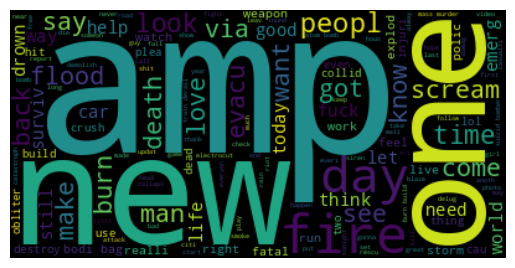

In [24]:
# Analysing common words using WordCloud

wc = WordCloud(background_color='black')
wc.generate(' '.join(train['Cleaned_text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Let's further analyse top 50 words of disaster/non-disastrous in training data:-

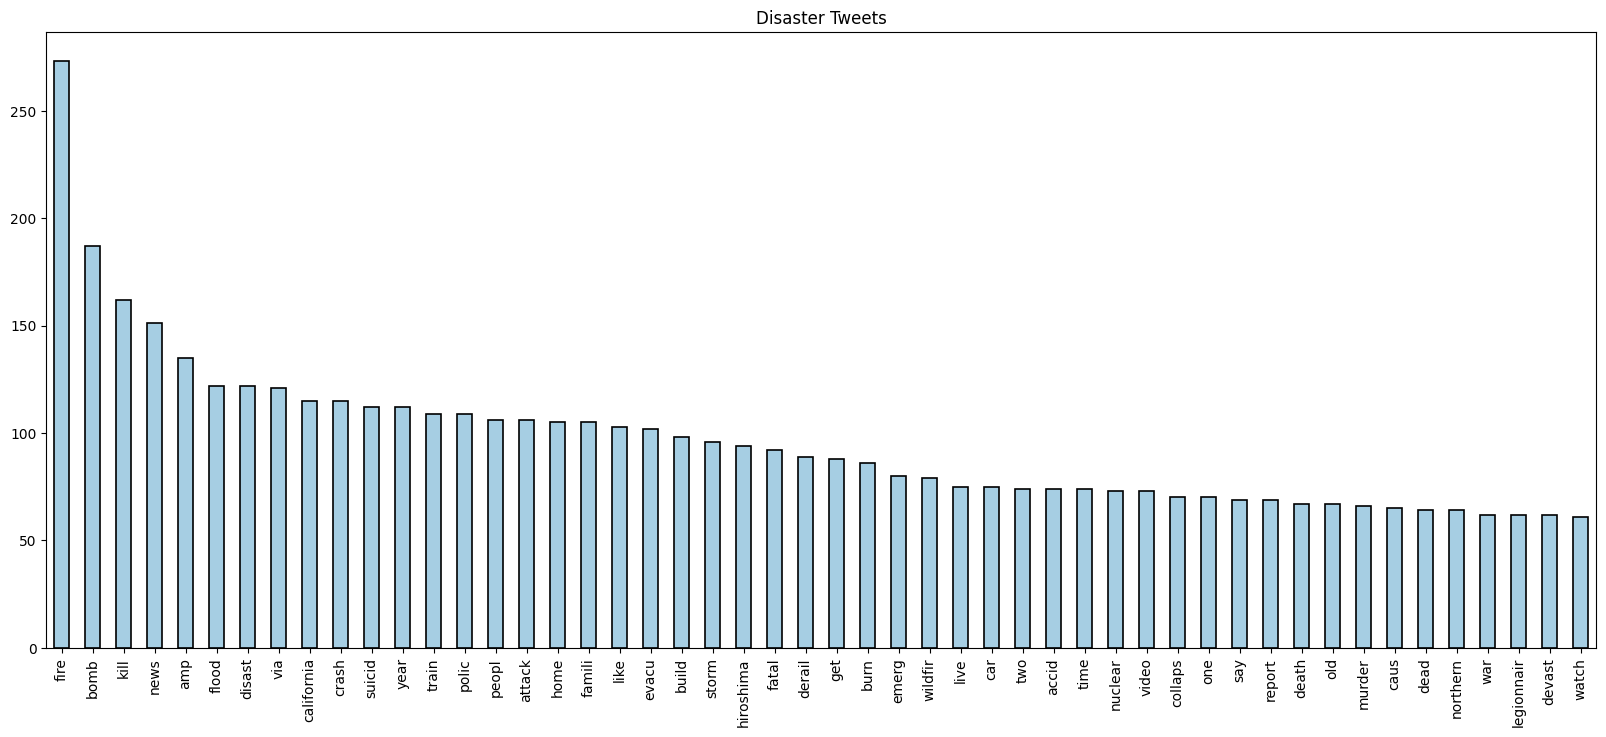

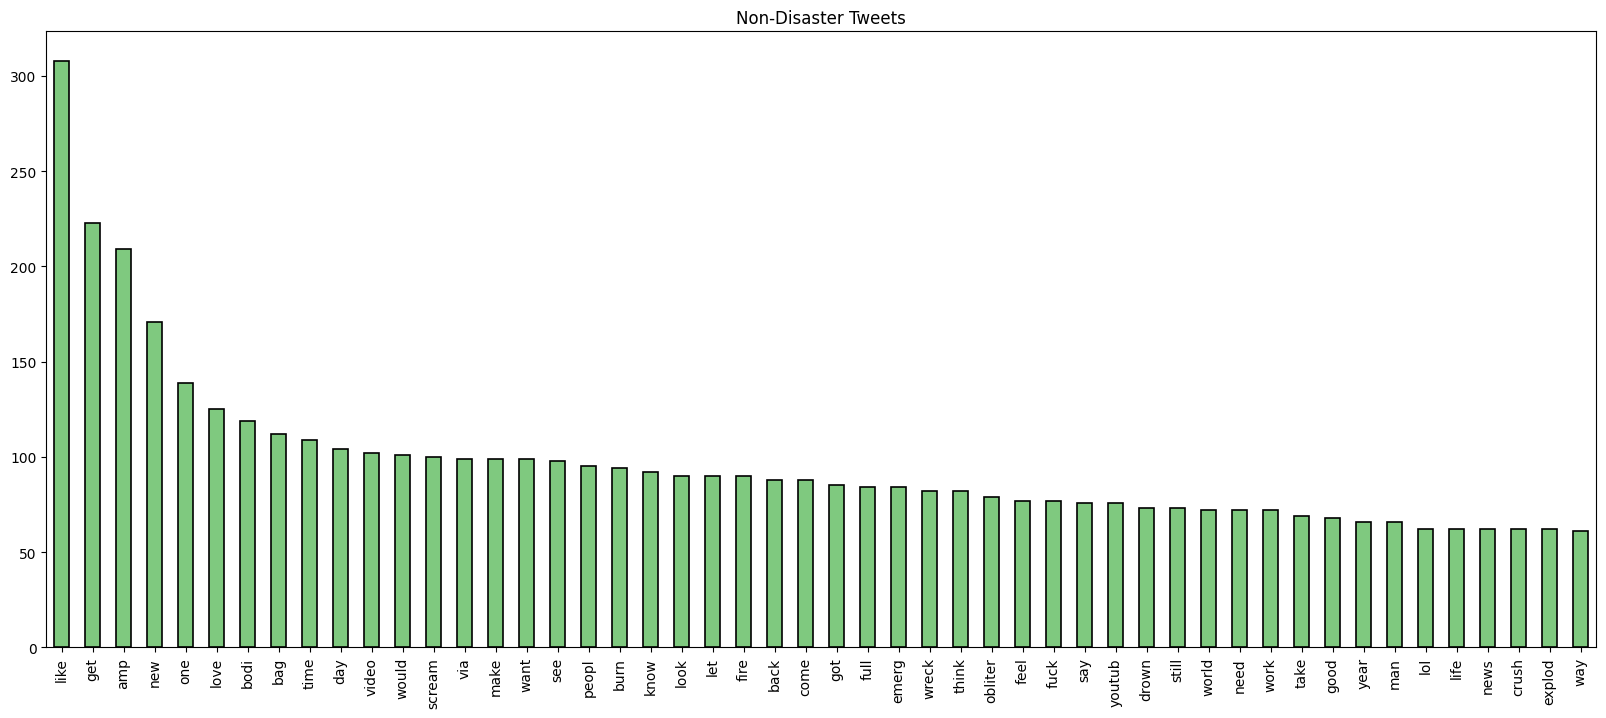

In [25]:
# Analysing top 50 words in training data

disaster_tweet = train[train.target==1]["Cleaned_text"]
non_disaster_tweet = train[train.target==0]["Cleaned_text"]

color = ['Paired','Accent']
splitedData = [disaster_tweet,non_disaster_tweet]
title = ["Disaster Tweets", "Non-Disaster Tweets"]
for item in range(2):
    plt.figure(figsize=(20,8))
    plt.title(title[item],fontsize=12)
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(50).plot(kind='bar',fontsize=10,colormap=color[item],edgecolor='black', linewidth=1.2)
    plt.show()

From above chart, it appears that our cleaned text still contains some unnecessary words (such as: like, amp, get, would etc.) that aren't relevant and can confuse our model, resulting in false prediction. Now, we will further remove some confusing words from text based on above charts.

In [26]:
common_words = ['via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

train["Cleaned_text"] = train["Cleaned_text"].apply(text_cleaning)
test["Cleaned_text"] = test["Cleaned_text"].apply(text_cleaning)

Let's check one example whether there are any change occured or not

In [27]:
train.head(1) # Much more cleaner

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak allah forgiv


Let's transform the data in numerical format that is suitable for prediction by models. We will use following techniques to transform the data.

*   BOW
*   TF-IDF.
*   Word Embbedding using Glove Vectors.

Let's first start by analysing top N-grams using Bag Of Words.

In [28]:
# Creating function for analysing top n grams

def top_ngrams(data,n,grams):
    '''
    Input:- Data: Input Data
            n   : Number of top n-words
            grams:Type of N-grams. 1-> Unigram  2-> Bigram  3->Trigram

    Output: Word Frequency of top  n words

    '''
    if grams == 1:
        count_vec = CountVectorizer(ngram_range=(1,1)).fit(data)
        bow = count_vec.transform(data)
        add_words = bow.sum(axis=0)
        word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
        word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
    elif grams == 2:
        count_vec = CountVectorizer(ngram_range=(2,2)).fit(data)
        bow = count_vec.transform(data)
        add_words = bow.sum(axis=0)
        word_freq = [(word,add_words[0,idx]) for word,idx in count_vec.vocabulary_.items()]
        word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
    elif grams == 3:
        count_vec = CountVectorizer(ngram_range=(3,3)).fit(data)
        bow = count_vec.transform(data)
        add_words = bow.sum(axis=0)
        word_freq = [(word,add_words[0,idx]) for word,idx in count_vec.vocabulary_.items()]
        word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)

    return word_freq[:n]

Plotting top 20 N-grams

<ipython-input-29-0fc341d8ca98>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rotation=90,labels=common_words_uni_df["word"],fontsize=10)
<ipython-input-29-0fc341d8ca98>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rotation=90,labels=common_words_bi_df["word"],fontsize=10)
<ipython-input-29-0fc341d8ca98>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(rotation=90,labels=common_words_tri_df["word"],fontsize=10)


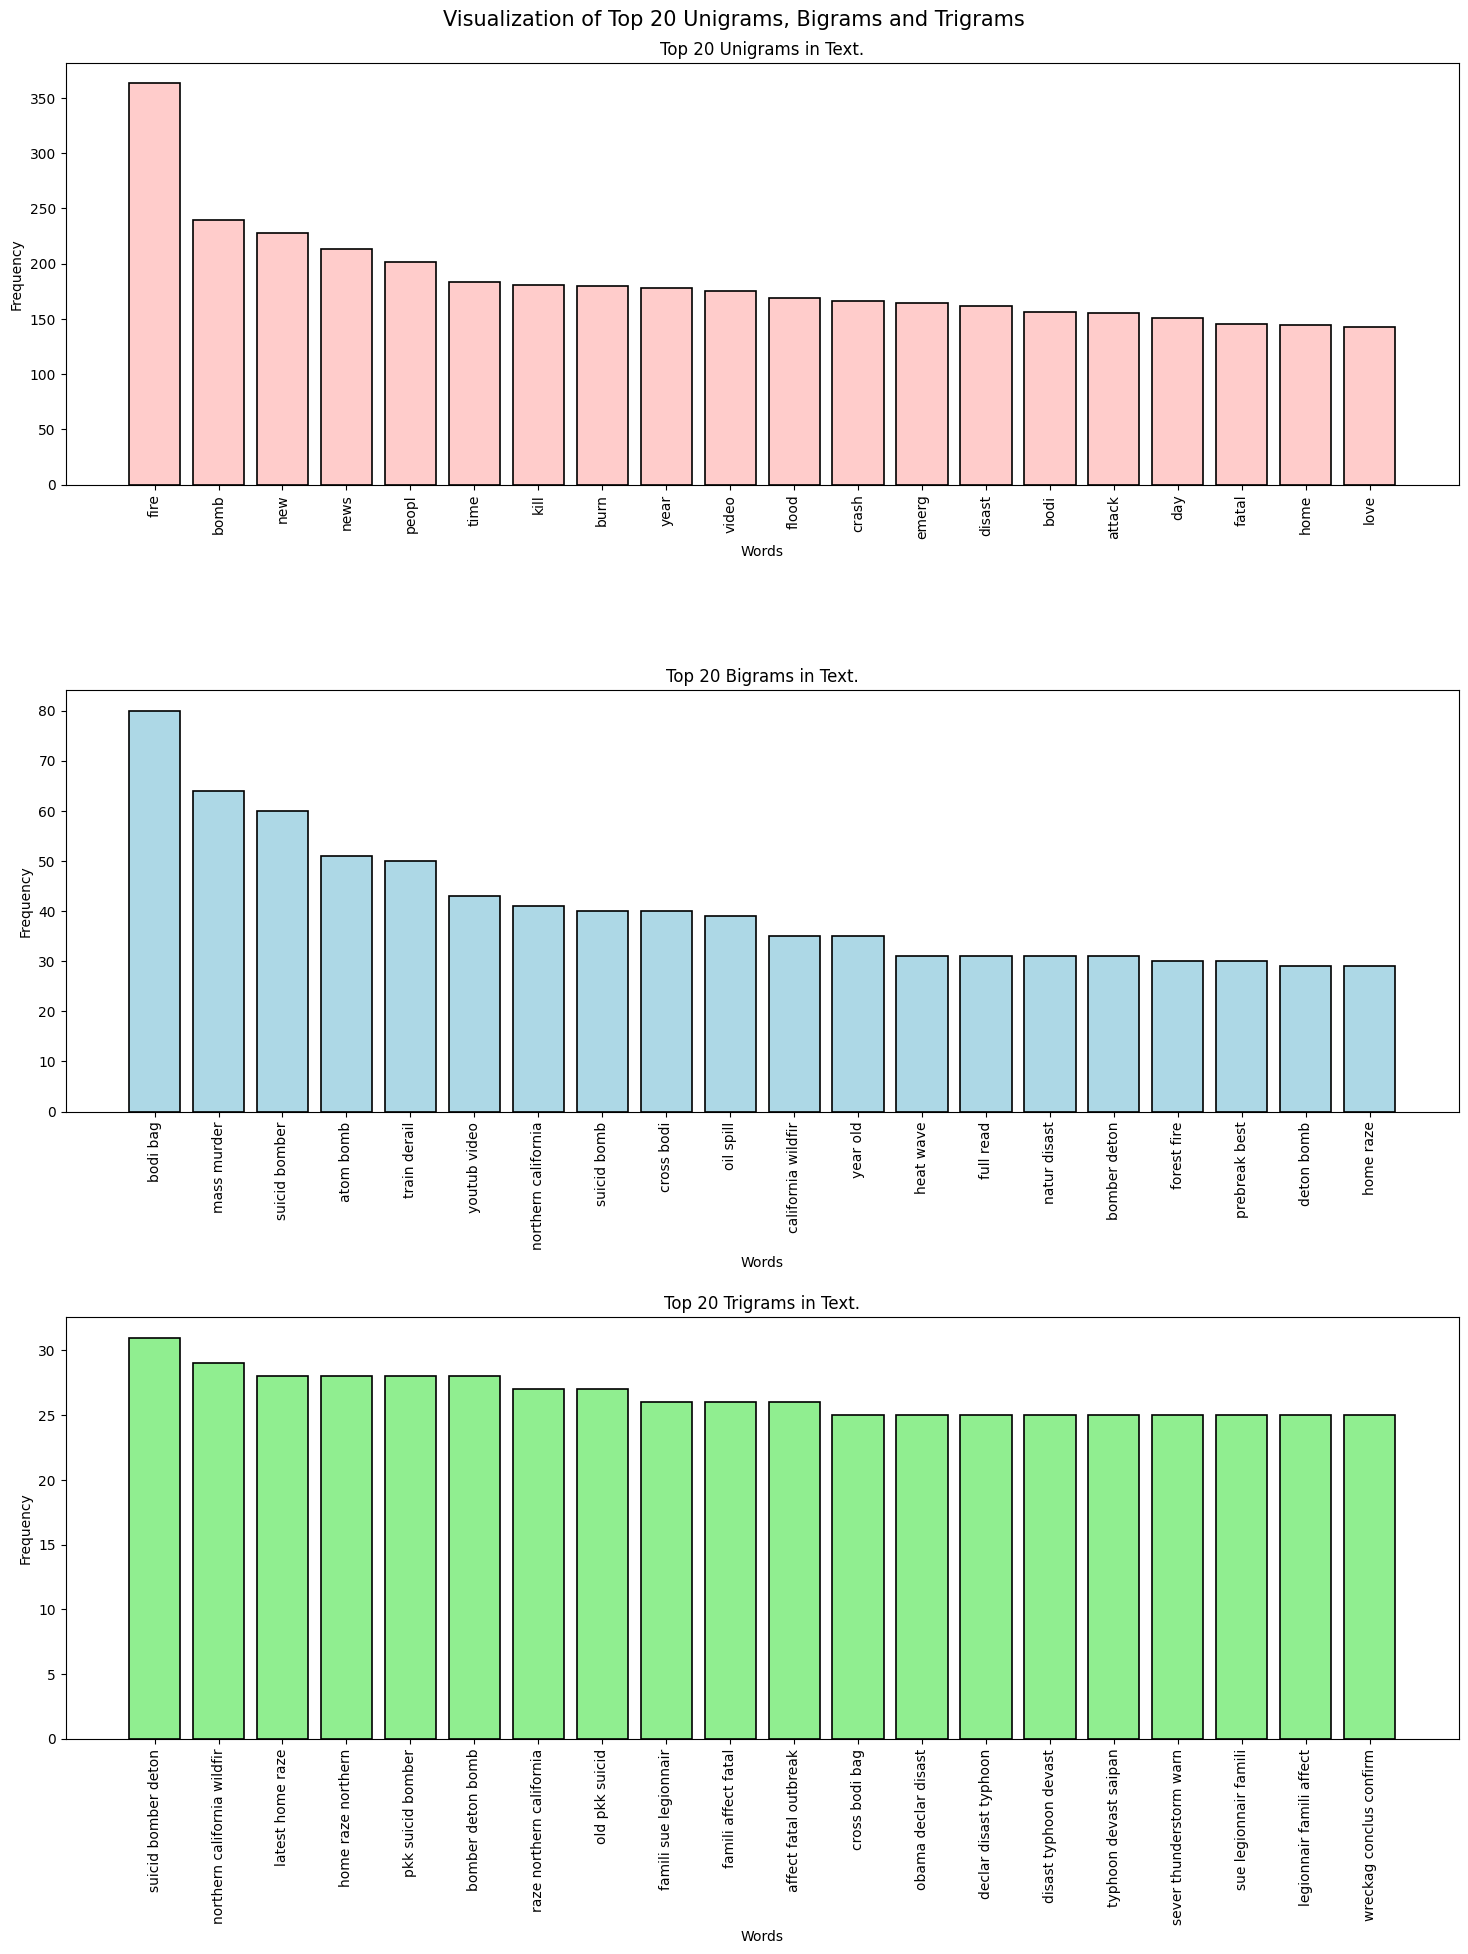

In [29]:
common_words_uni = top_ngrams(train["Cleaned_text"],20,1)
common_words_bi = top_ngrams(train["Cleaned_text"],20,2)
common_words_tri = top_ngrams(train["Cleaned_text"],20,3)
common_words_uni_df = pd.DataFrame(common_words_uni,columns=['word','freq'])
common_words_bi_df = pd.DataFrame(common_words_bi,columns=['word','freq'])
common_words_tri_df = pd.DataFrame(common_words_tri,columns=['word','freq'])
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,20))
ax1.bar(common_words_uni_df["word"],common_words_uni_df["freq"],color="#FFCCCB",edgecolor='black', linewidth=1.2)
ax1.set_title("Top 20 Unigrams in Text.")
ax1.set_xlabel("Words")
ax1.set_ylabel("Frequency")
ax1.set_xticklabels(rotation=90,labels=common_words_uni_df["word"],fontsize=10)

ax2.bar(common_words_bi_df["word"],common_words_bi_df["freq"],color="lightblue",edgecolor='black', linewidth=1.2)
ax2.set_title("Top 20 Bigrams in Text.")
ax2.set_xlabel("Words")
ax2.set_ylabel("Frequency")
ax2.set_xticklabels(rotation=90,labels=common_words_bi_df["word"],fontsize=10)

ax3.bar(common_words_tri_df["word"],common_words_tri_df["freq"] ,color="lightgreen",edgecolor='black', linewidth=1.2)
ax3.set_title("Top 20 Trigrams in Text.")
ax3.set_xlabel("Words")
ax3.set_ylabel("Frequency")
ax3.set_xticklabels(rotation=90,labels=common_words_tri_df["word"],fontsize=10)
plt.suptitle("Visualization of Top 20 Unigrams, Bigrams and Trigrams",fontsize="15")
plt.tight_layout(pad=1.85)
plt.show()

Let's perform data encoding using bow and tf-idf.

The function accepts cleaned training and testing data, boolean flags for selecting type of encoding as input and outputs cleaned text.

In [30]:
# Creating functions for using BOW,TF-IDF

def encoding(train_data,test_data,bow,tf_idf):
    '''
    Input : Data to be encoded and choice of encoding.
    Output : Desired Encoding.

    '''
    if bow==True:
        cv = CountVectorizer(ngram_range=(1, 1))
        cv_df_train = cv.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(cv_df_train,columns=cv.get_feature_names_out())
        cv_df_test = cv.transform(test_data).toarray()
        test_df = pd.DataFrame(cv_df_test,columns=cv.get_feature_names_out())

    elif tf_idf==True:

        tfidf = TfidfVectorizer(
            ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1)
        tf_df_train = tfidf.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(tf_df_train,columns=tfidf.get_feature_names_out())
        tf_df_test = tfidf.transform(test_data).toarray()
        test_df = pd.DataFrame(tf_df_test,columns=tfidf.get_feature_names_out())

    return train_df,test_df


x_final,x_test_final = encoding(train["Cleaned_text"],test["Cleaned_text"],bow=True,tf_idf=False)
y_final = np.array(y) # Converting y to array

In [46]:
# Checking dimensions of training and testing data
x_final.shape,y_final.shape,x_test_final.shape

((7613, 12687), (7613,), (3263, 12687))

Using Word Embedding using Glove Vectors for Encoding:-

In [31]:
#Converting to list
text = train["Cleaned_text"].tolist()
text_test = test["Cleaned_text"].tolist()
text[:3] # Analysing first 3 sentence in train data.

['deed reason earthquak allah forgiv',
 'forest fire near rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect']

Let's initialize a Tokenizer to read all the words in the text.

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(text)

# Finding the vocab size
vocab_size = len(token.word_index)+1
print("The vocabulary size is : {}".format(vocab_size))

The vocabulary size is : 12688


In [33]:
# Encoding tokens in words to numerical formats
encoded_text = token.texts_to_sequences(text)
encoded_text_test = token.texts_to_sequences(text_test)
encoded_text[:2]

[[3492, 430, 182, 1285, 2785], [110, 1, 153, 5026, 5027, 982]]

In [34]:
#Considering 120 words
max_length = 120 # Considering top 120 tokens.
X = pad_sequences(encoded_text,maxlen=max_length,padding='post') # This is done to make the sequence of same length.
X_test = pad_sequences(encoded_text_test,maxlen=max_length,padding='post')
X

array([[3492,  430,  182, ...,    0,    0,    0],
       [ 110,    1,  153, ...,    0,    0,    0],
       [1286,  481, 1570, ...,    0,    0,    0],
       ...,
       [ 580,  378, 1276, ...,    0,    0,    0],
       [  21,  141, 1877, ...,    0,    0,    0],
       [ 142,   19,  361, ...,    0,    0,    0]], dtype=int32)

Let's create some Models !!!

In [35]:
# Dividing the data into training, validation and testing
from sklearn.model_selection import train_test_split
# for bow and tf-idf
#x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.1, random_state=42, stratify = y_final)
#X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
#x_test_final = x_test_final

#  for Word Embeddings
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)
X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
#x_test_final = x_test_final

 1. Long Short Tem Memory (LSTM)

In [36]:
from keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers

embedding_feature_vector = 200 # Since we used glove vector embedding of dim 200.
model = Sequential()
model.add(Embedding(vocab_size,embedding_feature_vector,input_length=max_length, trainable = False))
model.add(Dropout(0.35))
model.add(LSTM(200))
model.add(Dropout(0.35))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 200)          2537600   
                                                                 
 dropout (Dropout)           (None, 120, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 200)               320800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2864865 (10.93 MB)
Trainable params: 327

In [37]:
from tensorflow.keras.callbacks import *
n_epoch = 30

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1,
                           mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,
                              verbose=1, mode='min')

In [76]:
# Training the model
history = model.fit(X_train,Y_train,validation_data=(x_valid,y_valid),callbacks=[reduce_lr,early_stop],epochs=n_epoch,batch_size= 64)

Epoch 1/30
97/97 [==============================] - 47s 427ms/step - loss: 0.6855 - accuracy: 0.5695 - val_loss: 0.6834 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 2/30
97/97 [==============================] - 39s 403ms/step - loss: 0.6844 - accuracy: 0.5703 - val_loss: 0.6833 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 3/30
97/97 [==============================] - 41s 424ms/step - loss: 0.6844 - accuracy: 0.5703 - val_loss: 0.6837 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 4/30
97/97 [==============================] - 41s 423ms/step - loss: 0.6839 - accuracy: 0.5703 - val_loss: 0.6839 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 5/30
97/97 [==============================] - 39s 401ms/step - loss: 0.6840 - accuracy: 0.5703 - val_loss: 0.6845 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 6/30
97/97 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.5703
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
97/97 [==============================] - 40s 413m

In [47]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
cr = classification_report(y_test,predictions)
print(cr)

24/24 [==============================] - 4s 173ms/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       435
           1       0.00      0.00      0.00       327

    accuracy                           0.57       762
   macro avg       0.29      0.50      0.36       762
weighted avg       0.33      0.57      0.41       762



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Logistic Regression

In [48]:
model_1 = LogisticRegression(C=1.0)
model_1.fit(X_train,Y_train)
pred_1 = model_1.predict(x_test)
cr1    = classification_report(y_test,pred_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.57      0.92      0.71       435
           1       0.45      0.08      0.14       327

    accuracy                           0.56       762
   macro avg       0.51      0.50      0.42       762
weighted avg       0.52      0.56      0.46       762



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3. Naive Bayes

In [49]:
model_2 = MultinomialNB(alpha=0.7)
model_2.fit(X_train,Y_train)
pred_2 = model_2.predict(x_test)
cr2    = classification_report(y_test,pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       435
           1       0.48      0.35      0.40       327

    accuracy                           0.56       762
   macro avg       0.54      0.53      0.53       762
weighted avg       0.55      0.56      0.54       762



Now, Let's Compare the performance of various ML/DL Models

In [54]:
acc_1 = 0.78084
acc_2 = 0.78740
acc_3 = 0.82021

results = pd.DataFrame([["Logistic Regression",acc_1],["Naive Bayes",acc_2],
                       ["LSTM",acc_3]],columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)
results.style.background_gradient(cmap='Blues')

,Models,Accuracy Score
2,LSTM,0.820210
1,Naive Bayes,0.787400
0,Logistic Regression,0.780840


Conclusion
From the above table, it appears that LSTM model performs the best by achieving an overall accuracy of about 82.02% while Passive Aggresive Model performs less accurately by outputing an accuracy score of about 78.08% .

Since, the LSTM Model shows robust performance, therefore it is selected as the final prediction model.